In [86]:
%matplotlib inline
import pandas as pd

In [87]:
# from IPython.core.display import HTML
# css = open('style-table.css').read() + open('style-notebook.css').read()
# HTML('<style>{}</style>'.format(css))

In [88]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [89]:
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct')]

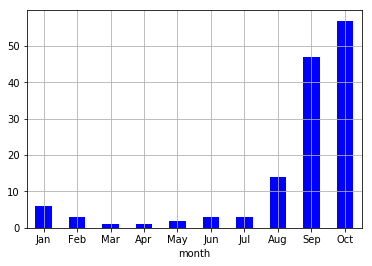

In [98]:
r = release_dates
r['month'] = r['date'].dt.month #use the datetime objects in date to add a month column with just the months
df2 = r[(r['title'].str.contains('Christmas')) & (r['country']=='USA')] # do the necessary filtering/subsetting
df2 = df2.groupby('month').size() # groupby month
ax = df2.plot(kind='bar', color='blue', grid=True, rot=0) # plot graph and save it in an ax variable
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul',"Aug",'Sep','Oct','Nov','Dec'])


### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

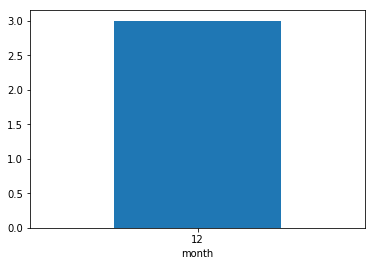

In [105]:
df3 = r[(r['title'].str.startswith('The Hobbit')) & (r['country']=='USA')] # do filtering/subsetting
df3 = df3.groupby('month').size()# groupby month
df3.plot(kind='bar', rot=0)

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tue'),
 Text(0, 0, 'Wed'),
 Text(0, 0, 'Thur'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sat'),
 Text(0, 0, 'Sun')]

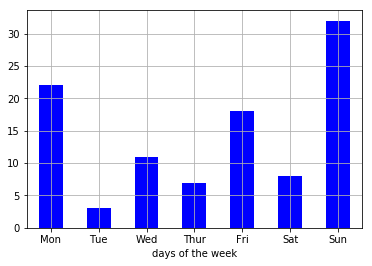

In [114]:
r['days of the week'] = r['date'].dt.dayofweek
df4 = r[(r['title'].str.contains('Romance')) & (r['country']=='USA')] # do filtering/subsetting
g4 = df4.groupby('days of the week').size()#groupby day of the week
ax=g4.plot(kind='bar', color='blue', grid=True, rot=0) #plot chart and save to ax variable
ax.set_xticklabels(['Mon','Tue','Wed','Thur','Fri', 'Sat', 'Sun']) # edit xticklabels



### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tue'),
 Text(0, 0, 'Wed'),
 Text(0, 0, 'Thur'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sat'),
 Text(0, 0, 'Sun')]

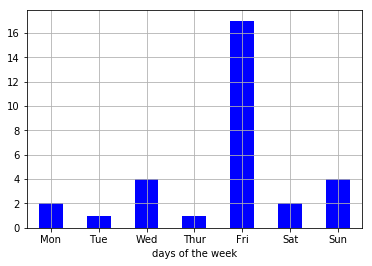

In [125]:
r['days of the week'] = r['date'].dt.dayofweek
df5 = r[(r['title'].str.contains('Action')) & (r['country']=='USA')] # do filtering/subsetting
g5 = df5.groupby('days of the week').size()#groupby day of the week
ax2=g5.plot(kind='bar', color='blue', grid=True, rot=0) #plot chart and save to ax variable
ax2.set_xticklabels(['Mon','Tue','Wed','Thur','Fri', 'Sat', 'Sun']) # edit xticklabels



### On which date was each Judi Dench movie from the 1990s released in the USA?

In [130]:
c = cast[(cast['name']=='Judi Dench') & (cast['year']//10==199)] #filter first dataframe

df5 = r[r['country'] =='USA'] #filter second dataframe

c.merge(df5) #bring the two df's together using. NB: call merge on the smaller df


,title,year,name,type,character,n,country,date,month,days of the week
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17,11,4
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25,12,2
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22,3,4
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03,10,4
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08,1,4
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14,5,4
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19,11,4
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19,12,4


### In which months do films with Judi Dench tend to be released in the USA?

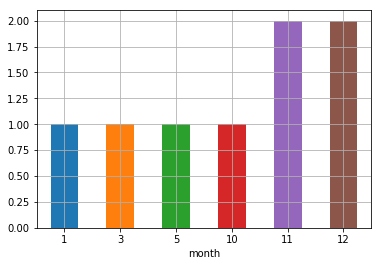

In [134]:
c = cast[(cast['name']=='Judi Dench') & (cast['year']//10==199)] #filter first dataframe

df5 = r[r['country'] =='USA'] #filter second dataframe

c.merge(df5).groupby('month').size().plot(kind='bar', rot=0, grid=True)

### In which months do films with Tom Cruise tend to be released in the USA?

Text(0, 0.5, 'No. of Films')

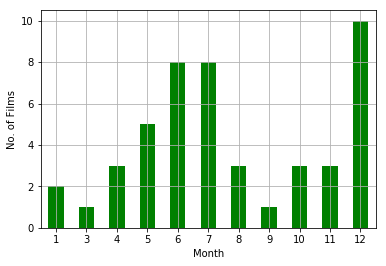

In [141]:
c = cast[(cast['name']=='Tom Cruise')] #filter first dataframe

df5 = r[r['country'] =='USA'] #filter second dataframe

ax = c.merge(df5).groupby('month').size().plot(kind='bar', rot=0, grid=True, color='green')

ax.set_xlabel("Month")
ax.set_ylabel("No. of Films")